### Описание проекта  'Статистический анализ поездок GoFast'

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи** — `users_go.csv`
- `user_id` – уникальный идентификатор пользователя
- `name` - имя пользователя
- `age` -	возраст
- `city` - город
- `subscription_type` - тип подписки (free, ultra)

**Поездки** — `rides_go.csv`
- `user_id` – уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

**Подписки** — `subscriptions_go.csv`
- `subscription_type` – тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - 	стоимость ежемесячного платежа

**Цель исследования** – анализ данных и проверка некоторыз гипотез, которые могут помочь принять некоторые стратегические решения для роста бизнеса. 

### Загрузка данных

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import stats as st

In [5]:
from scipy.stats import binom

In [6]:
from scipy.stats import norm

In [7]:
# Загружаем о пользователях
users_data = pd.read_csv('/datasets/users_go.csv')
users_data.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [8]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [9]:
# Загружаем данные о поездках
rides_data = pd.read_csv('/datasets/rides_go.csv')
rides_data.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [10]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [11]:
# Загружаем данные о типах подписки
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_data

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Предобработка данных

#### Обработка столбца с датами

In [12]:
# Перевод столбца 'date' в формат datetime64
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y.%m.%d')

# Создайте столбца 'month' с номером месяца на основе столбца date.
rides_data['month'] = pd.DatetimeIndex(rides_data['date']).month

# Проверка
rides_data.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Поиск и обрабокта пропущенных значений и дубликатов

In [13]:
# Поиск пропусков в 'rides_data'
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
# Поиск дубликатов в 'rides_data'
rides_data.duplicated().sum()

0

In [15]:
# Поиск пропусков в 'users_data'
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
# Поиск дубликатов в 'users_data'
users_data.duplicated().sum()

31

In [17]:
# Удаление дублирующихся строк из 'users_data'
users_data = users_data.drop_duplicates()

# Проверка
users_data.duplicated().sum()

0

In [18]:
# Проверка на неявные дубликаты в 'users_data'
users_data['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

### Исследовательский анализ данных

#### Частота встречаемости городов

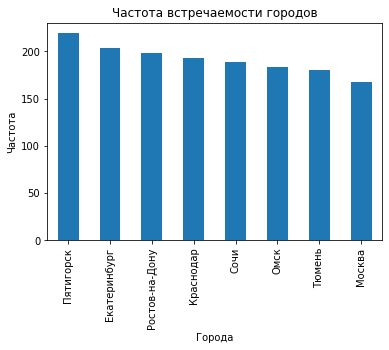

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [19]:
# Графический вывод частоты встречаемости городов
users_data['city'].value_counts().plot(kind = 'bar',
                                       title = 'Частота встречаемости городов',
                                       xlabel = 'Города',
                                       ylabel = 'Частота')
plt.show()

# Вывод численных значений частоты встречаемости городов
users_data['city'].value_counts()

#### Соотношение пользователей с подпиской и без подписки

In [20]:
# Количество пользователей
len(users_data['subscription_type'])

1534

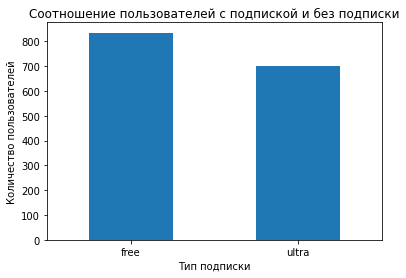

free     835
ultra    699
Name: subscription_type, dtype: int64

In [21]:
# Графический вывод cоотношение пользователей с подпиской и без подписки
users_data['subscription_type'].value_counts().plot(kind='bar',
                                                    title='Соотношение пользователей с подпиской и без подписки',
                                                    xlabel='Тип подписки',
                                                    ylabel='Количество пользователей',
                                                    rot=0
                                                   )
plt.show()

# Вывод численных значений cоотношениz пользователей с подпиской и без подписки
users_data['subscription_type'].value_counts()

#### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

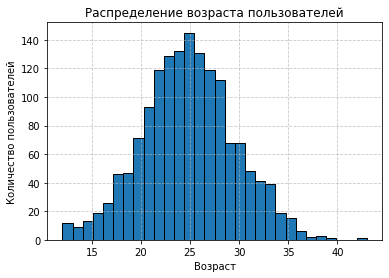

In [22]:
# Строим график распределения возраста пользователей
plt.hist(users_data['age'], bins=30, edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
users_data['age'].describe()

#### Расстояние, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

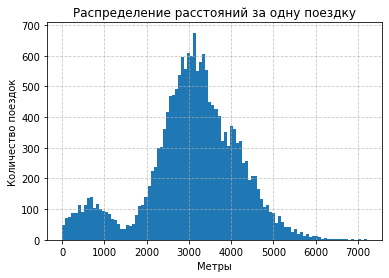

In [23]:
# Строим график распределения расстояния поездок
plt.hist(rides_data['distance'], bins = 100)
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Метры')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
rides_data['distance'].describe()

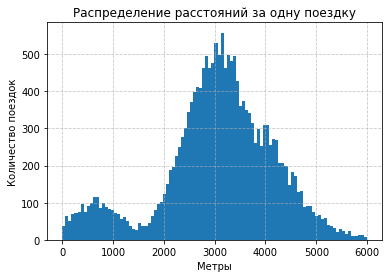

In [24]:
# Фильтрация данных по границам IQR
rides_data = rides_data[rides_data['distance'] <= 6000]
# Проверка фильтрации
plt.hist(rides_data['distance'], bins = 100)
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Метры')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

#### Продолжительность поездок

count    18022.000000
mean        17.799917
std          6.072652
min          0.500000
25%         13.595711
50%         17.667145
75%         21.709773
max         40.823963
Name: duration, dtype: float64

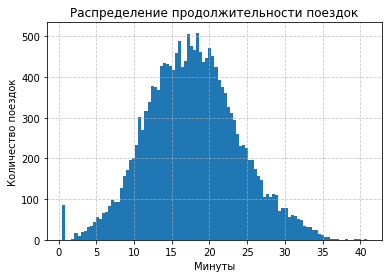

In [25]:
# Строим график распределения продолжительности поездок
plt.hist(rides_data['duration'], bins = 100)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Минуты')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
rides_data['duration'].describe()

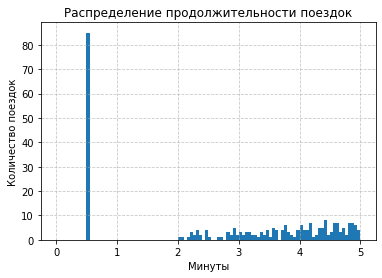

In [26]:
# Рассмотрения выброса данных
plt.hist(rides_data['duration'], bins = 100, range=(0,5))
plt.title('Распределение продолжительности поездок')
plt.xlabel('Минуты')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

In [27]:
# Определение границ IQR
iqr = rides_data['duration'].quantile(0.75) - rides_data['duration'].quantile(0.25)
up_lim_duration = rides_data['duration'].quantile(0.75) + 1.5 * iqr
down_lim_duration = rides_data['duration'].quantile(0.25) - 1.5 * iqr

# Фильтрация данных по границам IQR
rides_data = rides_data[(rides_data['duration'] <= up_lim_duration) & (rides_data['duration'] >= down_lim_duration)]

count    17855.000000
mean        17.802540
std          5.865479
min          2.035632
25%         13.646146
50%         17.668998
75%         21.669573
max         33.879527
Name: duration, dtype: float64

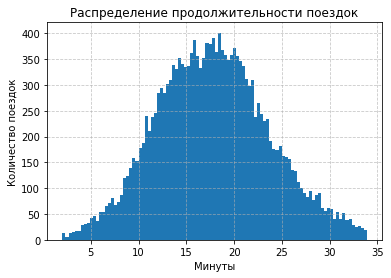

In [28]:
# Проверка фильрации
plt.hist(rides_data['duration'], bins = 100)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Минуты')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
rides_data['duration'].describe()

### Объединение данных

#### Объедините данные о пользователях, поездках и подписках в один датафрейм

In [29]:
# Объединение users_data и rides_data по столбцу 'user_id'
users_rides_data = pd.merge(users_data, rides_data, on='user_id', how='inner')

# Объединение users_rides_data и subscriptions_data по столбцу subscription_type
data = pd.merge(users_rides_data, subscriptions_data, on='subscription_type', how='inner')

# Округление продолжительности каждой поездки
data['duration'] = np.ceil(data['duration'])

# Проверка объединения
data.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил округление продолжительности каждой поездки.</div>

In [30]:
# Проверка на пропуска после объединения таблиц
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [31]:
#Проверка размера объедененный таблицы
if len(data) == len(users_rides_data):
    print('Размер объединенной таблицы соответствует ожиданиям')
else:
    print('Размер объединенной таблицы не соответствует ожиданиям')

Размер объединенной таблицы соответствует ожиданиям


#### Созадние датафрейма c данными о пользователях c подпиской и без

In [32]:
# Создание датафрейма c данными о пользователях c подпиской
data_ultra = data[data['subscription_type'] == 'ultra']

# Создание датафрейма c данными о пользователях без подписки
data_free = data[data['subscription_type'] == 'free']

#### Информация о расстоянии и времени поездок для пользователей c подпиской

count    6456.000000
mean     3107.100520
std       832.989306
min       244.210438
25%      2782.721161
50%      3145.069243
75%      3550.407476
max      5699.769662
Name: distance, dtype: float64

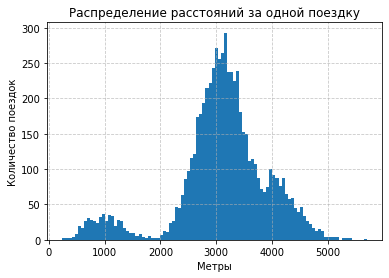

In [33]:
# Строим график распределения расстояния поездок
plt.hist(data_ultra['distance'], bins = 100)
plt.title('Распределение расстояний за одной поездку')
plt.xlabel('Метры')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
data_ultra['distance'].describe()

count    6456.000000
mean       18.920074
std         5.409100
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        34.000000
Name: duration, dtype: float64

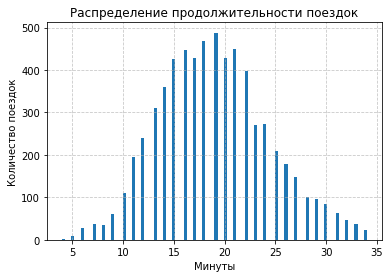

In [34]:
# Строим график распределения продолжительности поездок
plt.hist(data_ultra['duration'], bins = 100)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Минуты')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
data_ultra['duration'].describe()

#### Информация о расстоянии и времени поездок для пользователей без подписки

count    11399.000000
mean      3012.957242
std       1222.229807
min          0.855683
25%       2354.404760
50%       3091.807457
75%       3870.211348
max       5991.817697
Name: distance, dtype: float64

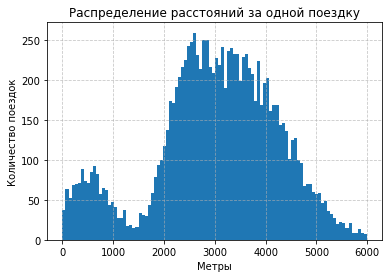

In [35]:
# Строим график распределения расстояния поездок
plt.hist(data_free['distance'], bins = 100)
plt.title('Распределение расстояний за одной поездку')
plt.xlabel('Метры')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
data_free['distance'].describe()

count    11399.000000
mean        17.950434
std          6.087773
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         34.000000
Name: duration, dtype: float64

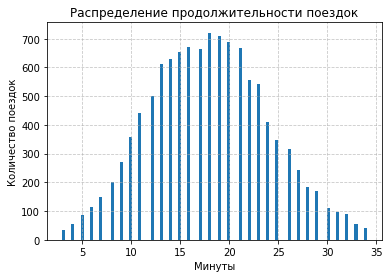

In [36]:
# Строим график распределения продолжительности поездок
plt.hist(data_free['duration'], bins = 100)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Минуты')
plt.ylabel('Количество поездок')
plt.grid(True, linestyle='--', alpha=0.7)

# Численно описываем данные
data_free['duration'].describe()

### Подсчёт выручки

Создадим сводную таблицу `data_revenue` с агрегированными данными о поездках на основе датафрейма `data` с объединёнными данными из пункта 4.1: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [37]:
# Создаём сводную таблицу с нужными агрегатами
data_revenue=data.pivot_table(
    index=['user_id', 'subscription_type', 'month'], # Группируем по id пользователя, типу подписки и месяце
    values=['distance', 'duration'],        # Выбираем столбцы distance и duration для агрегирования
    aggfunc={'distance': ['count', 'sum'],  # Количество и сумма поездок
             'duration': 'sum'}             # Сумма времени поездок каждого пользователя
)

# Перемеименовываем столбцы
data_revenue.columns = ['ride_count', 'total_distance', 'total_duration']
#Сбрасываем индексы
data_revenue = data_revenue.reset_index()


data_revenue.head(10)

,user_id,subscription_type,month,ride_count,total_distance,total_duration
0,1,ultra,1,2,7027.511294,42.0
1,1,ultra,4,1,754.159807,7.0
2,1,ultra,8,2,6723.470560,46.0
3,1,ultra,10,2,5809.911100,32.0
4,1,ultra,11,3,7003.499363,56.0
5,1,ultra,12,2,6751.629942,28.0
6,2,ultra,3,3,10187.723006,63.0
7,2,ultra,4,2,6164.381824,40.0
8,2,ultra,6,1,3255.338202,14.0
9,2,ultra,7,2,6780.722964,48.0


В `data_revenue` добавим столбец с вырочкой `revenue`. 

Выручка считается по формуле: `стоимость старта поездки` × `количество поездок` + `стоимость одной минуты поездки` × `общая продолжительность всех поездок в минутах` + `стоимость подписки`.

In [38]:
# Создаем столбец с помесячной выручкой для каждого пользователя
data_revenue['revenue'] = np.where(
    data_revenue['subscription_type'] == 'ultra',
    6*data_revenue['total_duration'] + 199,
    50*data_revenue['ride_count']+8*data_revenue['total_duration'])
# Выводим результат
data_revenue.head(5)

,user_id,subscription_type,month,ride_count,total_distance,total_duration,revenue
0,1,ultra,1,2,7027.511294,42.0,451.0
1,1,ultra,4,1,754.159807,7.0,241.0
2,1,ultra,8,2,6723.470560,46.0,475.0
3,1,ultra,10,2,5809.911100,32.0,391.0
4,1,ultra,11,3,7003.499363,56.0,535.0


### Проверка гипотез

#### Гипотеза № 1
Тратят ли пользователи с подпиской больше времени на поездки чем пользователи без подписки?

In [39]:
# Извлекаем данные о времени поездках
duration_ultra = data_ultra['duration']
duration_free = data_free['duration']

# Уровень значимости
alpha = 0.05

# Одновыборочный t-тест
results_1 = st.ttest_ind(duration_ultra, duration_free, alternative='greater')

print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской не тратят значимо больше времени')

p-значение: 1.1831531737712197e-26
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки


#### Гипотеза № 2
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

#### Гипотеза № 3
Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

In [40]:
# Создадим два датафрейма с помесячной выручкой для пользователей с подпиской и без
data_revenue_ultra = data_revenue[data_revenue['subscription_type'] == 'ultra']
data_revenue_free = data_revenue[data_revenue['subscription_type'] == 'free']

In [41]:
# Извлекаем данные о помесячной выручке для каждой группы
revenue_ultra = data_revenue_ultra['revenue']
revenue_free = data_revenue_free['revenue']

# Уровень значимости
alpha = 0.05

# Одновыборочный t-тест
results_3 = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')

print('p-значение:', results_3.pvalue)

if results_3.pvalue < alpha: 
    print('Отверагем нулевую гипотезу: средняя помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: недостаточно доказательств, что средняя помесячная выручка от пользователей с подпиской выше')

p-значение: 8.117680327570415e-32
Отверагем нулевую гипотезу: средняя помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки


#### Гипотеза № 4

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае мы бы провели **двухвыборочный t-тест для зависимых выборок**. Необходимый метод из библиотеки `scipy`: `scipy.stats.ttest_rel`.

### Распределения

#### Задача 1
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [42]:
n = 1160  # тестовое количество разосланных промокодов 
p = 0.1
k = 99    # максимальное значение для продлений, при котором план не будет выполнен
probability = binom.cdf(k, n, p)
print("Вероятность не выполнить план при n =", n, ":", probability)

Вероятность не выполнить план при n = 1160 : 0.0507443655394362


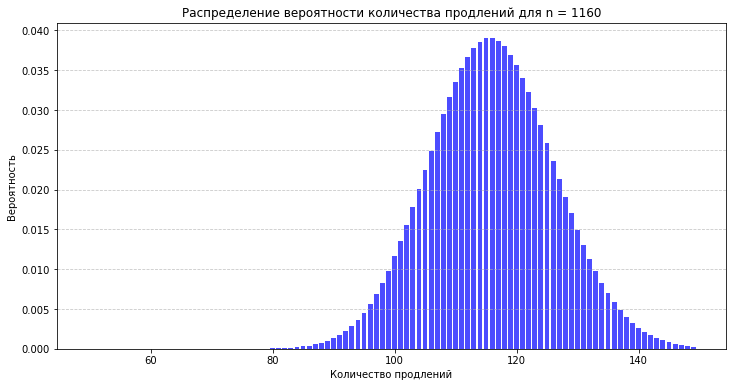

In [43]:
# Параметры задачи
n = 1160  # Количество промокодов, которые планируется разослать
p = 0.1   # Вероятность того, что пользователь продлит подписку

# Вычисление вероятностей только в окрестности значимых значений (50 до 150)
k_values = range(50, 150)
distr = [binom.pmf(k, n, p) for k in k_values]

# График
plt.figure(figsize=(12, 6))
plt.bar(k_values, distr, color='blue', alpha=0.7)
plt.title('Распределение вероятности количества продлений для n = 1160')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Задача 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [44]:
# Параметры задачи
n = 1000000       # Количество разосланных уведомлений
p = 0.4           # Вероятность открытия уведомления

# Расчёт параметров нормального распределения
mu = n * p                            # Среднее значение
sigma = np.sqrt(n * p * (1 - p))      # Стандартное отклонение

# Значение для оценки вероятности
k = 399500

# Вероятность того, что уведомление откроют не более 399500 раз
probability = norm.cdf(k, mu, sigma)

# Вероятность того, что уведомление откроют не более 399500 раз
probability = norm.cdf(k, mu, sigma)
print("Вероятность того, что уведомление откроют не более 399,5 тыс. раз:", probability)


Вероятность того, что уведомление откроют не более 399,5 тыс. раз: 0.15371708296369768


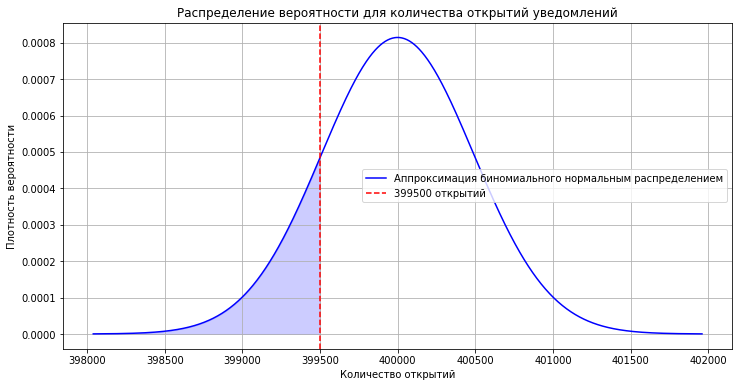

In [45]:
# Построение графика нормального распределения
x_values = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y_values = norm.pdf(x_values, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, color='blue', label='Аппроксимация биномиального нормальным распределением')
plt.axvline(k, color='red', linestyle='--', label='399500 открытий')
plt.fill_between(x_values, 0, y_values, where=(x_values <= k), color='blue', alpha=0.2)

# Подписи
plt.title('Распределение вероятности для количества открытий уведомлений')
plt.xlabel('Количество открытий')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

### Вывод

**Загрузка и подготовка данных:**
- Загрузили три датафрейма: с информацией о пользователях, поездках и подписках.
- Обработали данные, удалив пропущенные значения и дубликаты для обеспечения чистоты данных.

**Исследовательский анализ данных:**
- Провели анализ частоты встречаемости городов и распределения пользователей по типам подписки.
- Изучили возраст пользователей, чтобы понять возрастную структуру клиентов.
- Проанализировали среднее расстояние, преодолеваемое пользователями за одну поездку, и продолжительность поездок для обеих групп (с подпиской и без).
- Выявили различия в поведении пользователей с подпиской и без неё.

**Объединение данных:**
- Объединили три датафрейма в один, чтобы связать информацию о пользователях, поездках и подписках.
- Подготовили объединённые данные, в которых была доступна информация о выручке, расстояниях и других характеристиках пользователей с подпиской и без неё.

**Подсчёт выручки:**
- Рассчитали выручку для каждого пользователя с учётом его типа подписки (учитывались абонентская плата, стоимость поездок и стартов поездок).
- Получили данные о помесячной выручке, которые стали основой для проверки гипотез.

**Проверка гипотез:**
- Гипотеза 1: Тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки? Провели t-тест для независимых выборок, показавший, что пользователи с подпиской действительно проводят больше времени в поездках.
- Гипотеза 2: Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Провели одновыборочный t-тест, показавший, что среднее расстояние не превышает 3130 метров.
- Гипотеза 3: Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Выполнили t-тест для независимых выборок и подтвердили, что помесячная выручка от пользователей с подпиской значимо выше.

**Заключение:** Анализ подтвердил, что пользователи с подпиской тратят больше времени на поездки, проезжают не превышающее порог расстояние и приносят больше выручки. Эти выводы могут помочь компании в принятии решений о стратегии продвижения подписок и эффективности обновления серверов для снижения обращений в техподдержку.

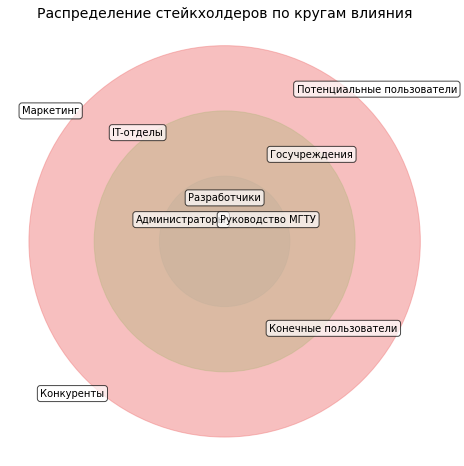

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Создаем область графика
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Добавляем круги для зон
circles = [
    Circle((0, 0), 3, color="lightblue", alpha=0.5, label="Внутренний круг"),
    Circle((0, 0), 6, color="lightgreen", alpha=0.5, label="Ближний круг"),
    Circle((0, 0), 9, color="lightcoral", alpha=0.5, label="Дальний круг"),
]

for circle in circles:
    ax.add_artist(circle)

# Задаем данные
data = {
    "Внутренний круг": ["Разработчики", "Администраторы", "Руководство МГТУ"],
    "Ближний круг": ["Госучреждения", "IT-отделы", "Конечные пользователи"],
    "Дальний круг": ["Потенциальные пользователи", "Маркетинг", "Конкуренты"],
}

positions = {
    "Внутренний круг": [(0, 2), (-2, 1), (2, 1)],
    "Ближний круг": [(4, 4), (-4, 5), (5, -4)],
    "Дальний круг": [(7, 7), (-8, 6), (-7, -7)],
}

# Добавляем подписи для каждого элемента
for key, pos_list in positions.items():
    for i, pos in enumerate(pos_list):
        ax.text(
            pos[0],
            pos[1],
            data[key][i],
            fontsize=10,
            ha="center",
            va="center",
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round"),
        )

# Настройка графика
ax.set_aspect("equal", "box")
ax.axis("off")
plt.title("Распределение стейкхолдеров по кругам влияния", fontsize=14)

# Сохраняем в файл (опционально)
plt.savefig("stakeholders_distribution.png", bbox_inches="tight")

# Показываем график
plt.show()